### importamos las librerias a utilizar

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os

### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [34]:
DATADIR = '/home/lenin/Documents/datasets/colores/old'
CATEGORIES = []
IMG_SIZE=25

recorremos el direcotorio excluyendo las imagenes de testeo

In [35]:
negative = []
for cate in os.listdir(DATADIR):
    if cate in negative: continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['azul', 'rojo', 'amarillo', 'rosado', 'celeste', 'blanco', 'cafe']
 total: 7


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [36]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    print(f'{category} : {labels}')
    labels+=1
print('done')

azul : 0
rojo : 1
amarillo : 2
rosado : 3
celeste : 4
blanco : 5
cafe : 6
done


verificamos el total de datos que tenemos

In [37]:
lenofimage = len(training_data)
print(lenofimage)

10780


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [38]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')
del training_data

done


verificamos la forma de nuestra data

In [39]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (10780,)
img (10780, 25, 25, 3)


dividimos la data para train y test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')
del X
del y

train: 8085, test: 2695


In [41]:
print(X_train.shape)

(8085, 25, 25, 3)


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [42]:
#  3x3 
# model = Sequential()
# model.add(Flatten(input_shape=(X_train[0].shape)))
# model.add(Dense(6, activation='relu'))
# model.add(Dense(len(CATEGORIES), activation='softmax'))



In [43]:
# model = Sequential([
#     Conv2D(32, (2,2), activation='relu', padding='SAME', input_shape=X_train[0].shape),
#     MaxPooling2D((2,2)),
#     Flatten(),
#     Dense(10, activation='relu'),
#     Dense(len(CATEGORIES), activation='softmax'),
# ])

In [44]:
X_train[0].shape

(25, 25, 3)

In [48]:
# 30 30
model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', padding='SAME', input_shape=(X_train[0].shape)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (2, 2), activation='relu', padding='SAME'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(len(CATEGORIES), activation='softmax'))



In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=50)

Epoch 1/20
162/162 [==============================] - 4s 17ms/step - loss: 0.6485 - accuracy: 0.7838
Epoch 2/20
162/162 [==============================] - 3s 17ms/step - loss: 0.1525 - accuracy: 0.9514
Epoch 3/20
162/162 [==============================] - 3s 17ms/step - loss: 0.1098 - accuracy: 0.9622
Epoch 4/20
162/162 [==============================] - 3s 18ms/step - loss: 0.0976 - accuracy: 0.9666
Epoch 5/20
162/162 [==============================] - 3s 18ms/step - loss: 0.0864 - accuracy: 0.9686
Epoch 6/20
162/162 [==============================] - 3s 17ms/step - loss: 0.0792 - accuracy: 0.9712
Epoch 7/20
162/162 [==============================] - 3s 19ms/step - loss: 0.0713 - accuracy: 0.9737
Epoch 8/20
162/162 [==============================] - 4s 22ms/step - loss: 0.0657 - accuracy: 0.9761
Epoch 9/20
162/162 [==============================] - 3s 20ms/step - loss: 0.0632 - accuracy: 0.9774
Epoch 10/20
162/162 [==============================] - 4s 22ms/step - loss: 0.0615 - accura

verificamos la precision en testeo

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.09469269961118698
test accuracy 0.9653679728507996


In [113]:
import sys
sys.path.append('/home/lenin/Documents/GitHub/ScriptsPython/')
import datag as dg
modelo_cargado = tf.keras.models.load_model("mod_color_v1_3x3.h5")
modelo_cargado.load_weights("mod_color_v1_weights_3x3.h5")


path = '/home/lenin/Documents/GitHub/Modelo-para-clasificacion-de-colores-ANN/imgs'
imgs = dg.extraer_nombres(path,['frame'])

for name in imgs:
    img = load_img(dg.os.path.join(path,name), target_size=(IMG_SIZE,IMG_SIZE))
    x = img_to_array(img)
    x=x/255
    x = x[np.newaxis, ...]
    resp = modelo_cargado.predict(x, verbose=0)
    print(f' label: {np.argmax(resp[0])}  clase: {CATEGORIES[np.argmax(resp[0])]}')
    

 label: 11  clase: cafe
 label: 1  clase: azul
 label: 11  clase: cafe
 label: 5  clase: rosado
 label: 4  clase: gris
 label: 8  clase: celeste
 label: 4  clase: gris
 label: 4  clase: gris
 label: 4  clase: gris
 label: 4  clase: gris


### Probamos el modelo entrenado

prediccion = azul


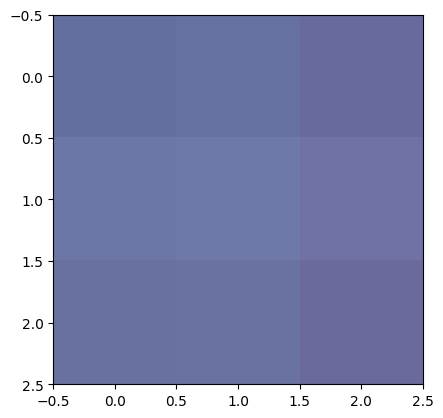

In [104]:

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = modelo_cargado.predict(x, verbose=0)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [81]:
model.save('mod_color_v1_3x3.h5')
model.save_weights("mod_color_v1_weights_3x3.h5")

In [ ]:
# model.save('mod_color_v1_1x1.h5')
# model.save_weights("mod_color_v1_weights_1x1.h5")

para cargarlos

In [17]:
# # Cargar la estructura del modelo
# modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# # Cargar los pesos del modelo
# modelo_cargado.load_weights("mod_color_v1_weights.h5")
# convd 
# drop out 
# max poling 
# padding 